# Normalización de datos

* *60:00 min* | Última modificación: Agosto 11, 2021 | YouTube

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Escalado lineal

In [2]:
raw_df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/concrete.csv",
)

raw_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


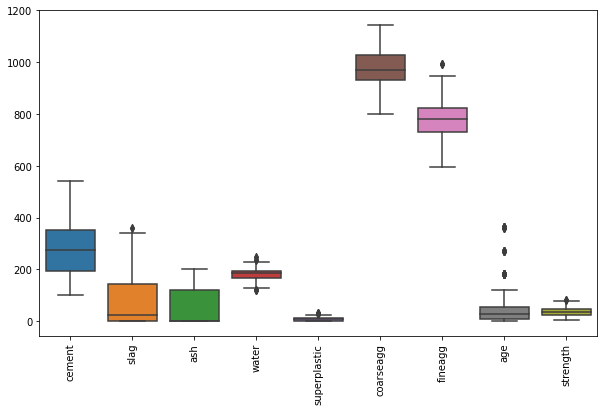

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_df)
plt.xticks(rotation=90)
plt.show()

En el escalado lineal se lleva cada columna al rango 0-1 con:

$$
x_{*} = \frac{x-\min(x)}{\max(x) - \min(x)}
$$

In [4]:
#
# Manual
#
(raw_df.cement - raw_df.cement.min()) / (raw_df.cement.max() - raw_df.cement.min())

0       1.000000
1       1.000000
2       0.526256
3       0.526256
4       0.220548
          ...   
1025    0.398174
1026    0.502740
1027    0.106164
1028    0.130365
1029    0.362785
Name: cement, Length: 1030, dtype: float64

In [5]:
#
# Con sklearn
#
from sklearn.preprocessing import MinMaxScaler

#
#  Se escalan todas las variables al rango [0, 1]
#  para evitar problemas asociados a la escala
#
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(raw_df),
    columns=raw_df.columns,
)
scaled_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


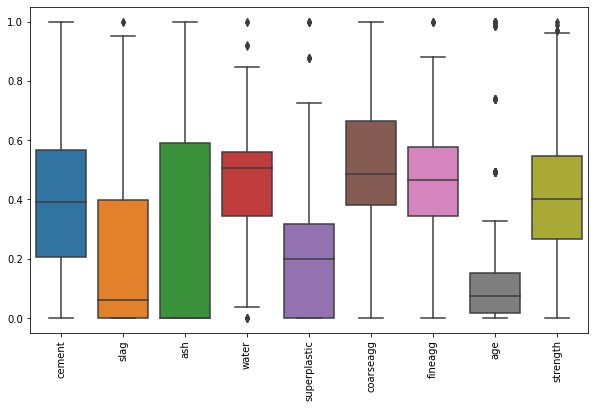

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.show()

## Estandarización

Se aplica la transformación:

$$
x_{*} = \frac{x - \text{mean}(x)}{\text{std}(x)}
$$

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(raw_df),
    columns=raw_df.columns,
)
scaled_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


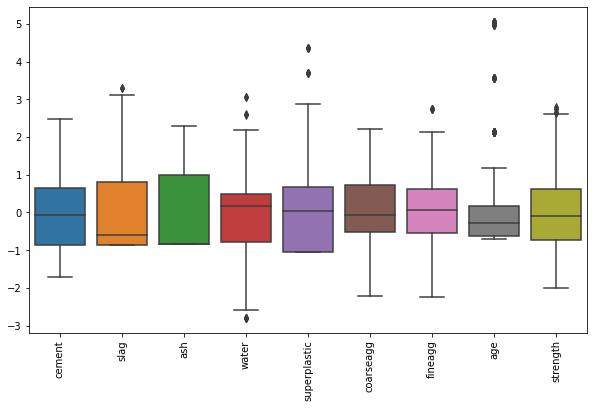

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.show()

In [9]:
#
# Media de cada una de las características
#
scaler.mean_

array([281.16786408,  73.89582524,  54.18834951, 181.56728155,
         6.20466019, 972.91893204, 773.58048544,  45.66213592,
        35.81796117])

In [10]:
#
# Desviación estándard de cada una de las características
#
scaler.scale_

array([104.45562093,  86.2374484 ,  63.9659301 ,  21.34384992,
         5.97094077,  77.71620016,  80.13705031,  63.13923913,
        16.69763041])

## maxabs_scale

In [11]:
#
# Transforma cada columna al intervalo [-1, 1].
# El maximo valor absoluto de cada columna 
# será igual a 1.0
#
from sklearn.preprocessing import maxabs_scale

maxabs_scaled_df = pd.DataFrame(
    maxabs_scale(scaled_df),
    columns=raw_df.columns,
)
maxabs_scaled_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.000000,-0.258826,-0.371378,-0.299044,-0.142512,0.389822,-0.445533,-0.055309,0.944209
1,1.000000,-0.258826,-0.371378,-0.299044,-0.142512,0.476991,-0.445533,-0.055309,0.557309
2,0.198322,0.240291,-0.371378,0.709625,-0.238684,-0.237789,-0.819929,0.702509,0.095166
3,0.198322,0.240291,-0.371378,0.709625,-0.238684,-0.237789,-0.819929,1.000000,0.111839
4,-0.319002,0.204915,-0.371378,0.159442,-0.238684,0.031852,0.237054,0.984343,0.181310


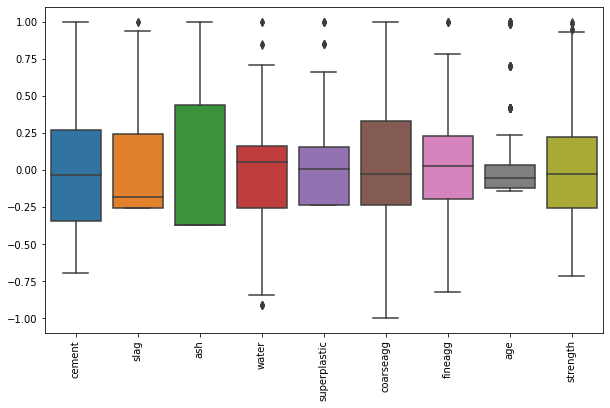

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=maxabs_scaled_df)
plt.xticks(rotation=90)
plt.show()

## Normalización

In [13]:
#
# Normaliza cada muestra individualmente para que
# su norma sea unitaria. La norma puede ser: 'l2',
# 'l1', 'max'.
#
from sklearn.preprocessing import Normalizer

normalized_df = pd.DataFrame(
    Normalizer().fit_transform(raw_df),
    columns=raw_df.columns,
)
normalized_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.395564,0.000000,0.0,0.118669,0.001831,0.761826,0.495187,0.020511,0.058595
1,0.392536,0.000000,0.0,0.117761,0.001817,0.766900,0.491397,0.020354,0.044989
2,0.273422,0.117181,0.0,0.187489,0.000000,0.766403,0.488458,0.222027,0.033115
3,0.268004,0.114859,0.0,0.183774,0.000000,0.751218,0.478781,0.294200,0.033087
4,0.145460,0.096973,0.0,0.140626,0.000000,0.716605,0.604618,0.263673,0.032446


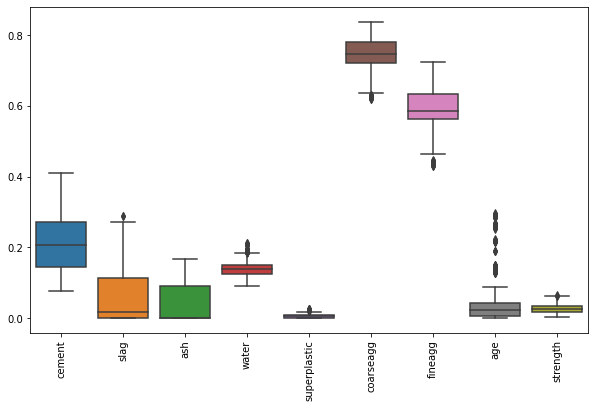

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)
plt.show()

## QuantileTransformer

In [15]:
#
# Realiza una transformación no lineal que mapea
# los datos a una distribucion uniforme en el 
# rango 0-1
#

from sklearn.preprocessing import QuantileTransformer

quantile_df = pd.DataFrame(
    QuantileTransformer().fit_transform(raw_df),
    columns=raw_df.columns,
)
quantile_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.000000,0.000000,0.0,0.206707,0.375375,0.760761,0.132132,0.521021,0.997209
1,1.000000,0.000000,0.0,0.206707,0.375375,0.826326,0.132132,0.521021,0.923226
2,0.701201,0.744745,0.0,0.970470,0.000000,0.264264,0.000000,0.974474,0.638555
3,0.701201,0.744745,0.0,0.970470,0.000000,0.264264,0.000000,1.000000,0.657658
4,0.264765,0.716717,0.0,0.697197,0.000000,0.576577,0.760761,0.983984,0.724725


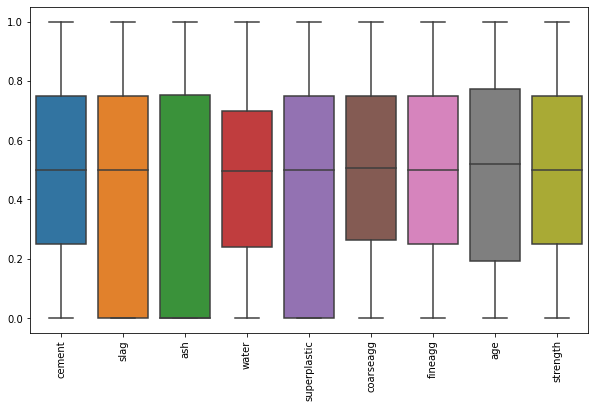

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=quantile_df)
plt.xticks(rotation=90)
plt.show()

## PowerTransformer

In [17]:
#
# Realizar una transformación no lineal para
# hacer que la distribución de cada columna sea
# más similar a una distribución normal
#
from sklearn.preprocessing import PowerTransformer

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(raw_df),
    columns=raw_df.columns,
)

power_df = pd.DataFrame(
    PowerTransformer(
        method="box-cox",
        standardize=False,
    ).fit_transform(scaled_df.values * 0.9 + 0.1),
    columns=raw_df.columns,
)
power_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.000000,-3.738452,-3.892746,-0.627850,-1.574444,-0.277372,-0.665464,-5.370476,-0.029484
1,0.000000,-3.738452,-3.892746,-0.627850,-1.574444,-0.237389,-0.665464,-5.370476,-0.247706
2,-0.508603,-0.916914,-3.892746,-0.137246,-1.975720,-0.569918,-0.810312,-0.309694,-0.551296
3,-0.508603,-0.916914,-3.892746,-0.137246,-1.975720,-0.569918,-0.810312,0.000000,-0.539236
4,-1.000318,-0.995194,-3.892746,-0.401606,-1.975720,-0.443108,-0.365545,-0.012522,-0.490031


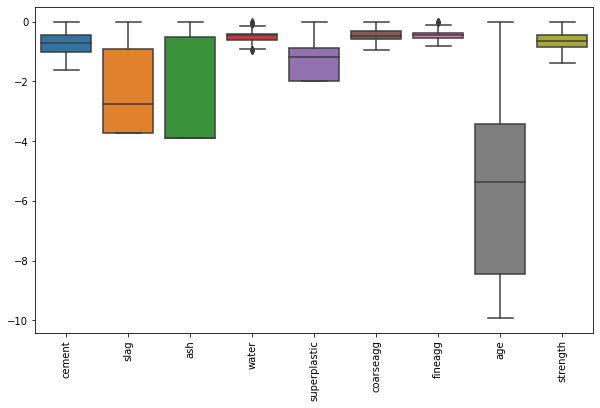

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=power_df)
plt.xticks(rotation=90)
plt.show()

## KBinsDiscretizer

In [19]:
X = np.array(
    [
        [0.0, 4.0, 12],
        [1.0, 5.0, 15],
        [2.0, 6.0, 14],
        [3.0, 3.0, 11],
        [4.0, 7.0, 11],
        [5.0, 3.0, 13],
        [6.0, 7.0, 11],
        [7.0, 6.0, 14],
        [8.0, 3.0, 18],
        [9.0, 2.0, 13],
        [10.0, 1.0, 14],
    ]
)
X

array([[ 0.,  4., 12.],
       [ 1.,  5., 15.],
       [ 2.,  6., 14.],
       [ 3.,  3., 11.],
       [ 4.,  7., 11.],
       [ 5.,  3., 13.],
       [ 6.,  7., 11.],
       [ 7.,  6., 14.],
       [ 8.,  3., 18.],
       [ 9.,  2., 13.],
       [10.,  1., 14.]])

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

KBinsDiscretizer(
    n_bins=[3, 2, 2],
    encode="ordinal",
).fit_transform(X)

array([[0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.]])

## Binarizer

In [21]:
X = [
    [1.0, -1.0, 2.0],
    [2.0, 0.0, 0.0],
    [0.0, 1.0, -1.0],
]
X

[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]

In [22]:
from sklearn.preprocessing import Binarizer

Binarizer(threshold=0.5).fit_transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## LabelEncoder

In [23]:
df = pd.DataFrame(
    [
        ["paris"],
        ["paris"],
        ["tokyo"],
        ["amsterdam"],
    ],
    columns=["city"],
)
df

,city
0,paris
1,paris
2,tokyo
3,amsterdam


In [24]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()
encoded_df['city'] = LabelEncoder().fit_transform(df.city)

encoded_df.head()

,city
0,1
1,1
2,2
3,0


## OneHotEncoder

In [25]:
X = [
    ["male", "from US", "uses Safari"],
    ["female", "from Europe", "uses Firefox"],
]

df = pd.DataFrame(X, columns=['sex', 'from', 'uses'])
df

,sex,from,uses
0,male,from US,uses Safari
1,female,from Europe,uses Firefox


In [26]:
pd.get_dummies(df)

,sex_female,sex_male,from_from Europe,from_from US,uses_uses Firefox,uses_uses Safari
0,0,1,0,1,0,1
1,1,0,1,0,1,0


In [27]:
#
# Con sklearn
#
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder().fit_transform(df.values).toarray()

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.]])